# Model 1: Unbiased transmission

Original: https://bookdown.org/amesoudi/ABMtutorial_bookdown/model1.html#model1

## Note
- the simplest possible case of cultural evolution.
- $N$ individuals have two traits, A and B.
- Each generation, the $N$ agents are replaced with $N$ new agents.
- Each new agent picks a member of the previous generation at random and copies their cultural trait.
- This is known as unbiased oblique cultural transmission:
    - unbiased because traits are copied entirely at random,
    - and oblique because one generation learns from the previous non-overlapping generation. 
- We are interested in tracking the proportion of individuals ($p$) who possess trait $A$ over successive generations ($t$).
- These could correspond to biological generations, but could equally be 'cultural generations' (or learning episodes) within the same fixed population, which would be much shorter.

In [1]:
include("src/Agent.jl")
include("src/Output.jl")
using .Agent
using .Output

In [2]:
make_agent_df = Agent.make_agent_AB_df;

In [3]:
function unbiased_transmission(;N::Int64, r_max::Int64, t_max::Int64, p_0::Float64)
    # N: population
    # r_max: number of independent runs
    # t_max: max of generations (t)
    outputs_df = make_output_df(r_max, t_max)

    for r = 1:r_max
        agents_df = make_agent_df(N, p_0)

        for t = 1:t_max
            if t > 1
                # randomly copy from previous generation's agents
                agents_df.trait = rand(agents_df.trait, N)
            end

            # get p and put it into the output slot for this generation t
            row_num = t + (r - 1) * t_max
            outputs_df.r[row_num] = r
            outputs_df.t[row_num] = t
            outputs_df.p[row_num] = trait_ratio(agents_df, A)
        end
    end

    plot_A(outputs_df, "N = $N, p_0 = $p_0")
end;

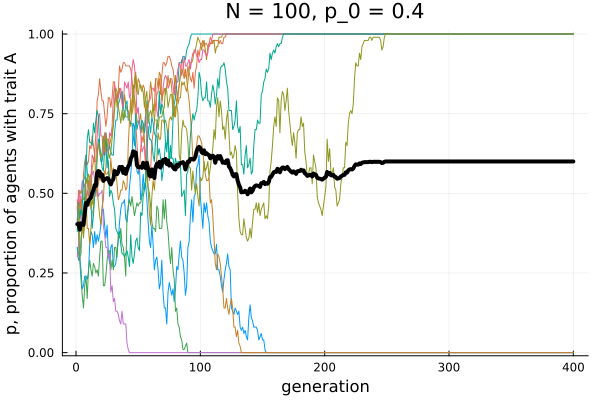

In [4]:
unbiased_transmission(N = 10^2, r_max = 10, t_max = 400, p_0 = 0.4)

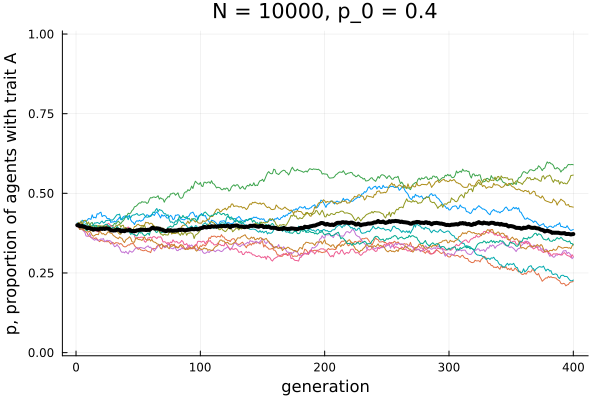

In [5]:
unbiased_transmission(N = 10^4, r_max = 10, t_max = 400, p_0 = 0.4)